Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 7)              │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 171.3088 - mse: 171.3088
Epoch 2/7
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 162.1800 - mse: 162.1800
Epoch 3/7
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 148.5347 - mse: 148.5347 
Epoch 4/7
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 130.4487 - mse: 130.4487
Epoch 5/7
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 110.2576 - mse: 110.2576
Epoch 6/7
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95.5255 - mse: 95.5255  
Epoch 7/7
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 88.0843 - mse: 88.0843


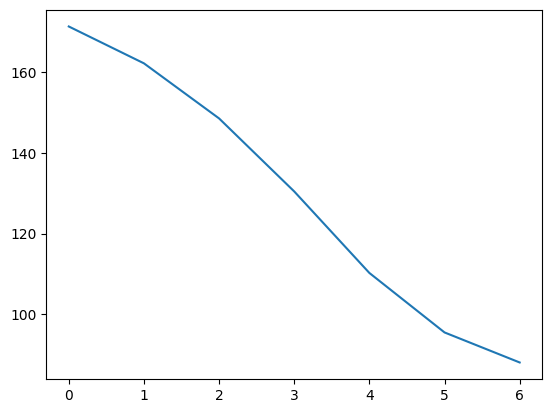

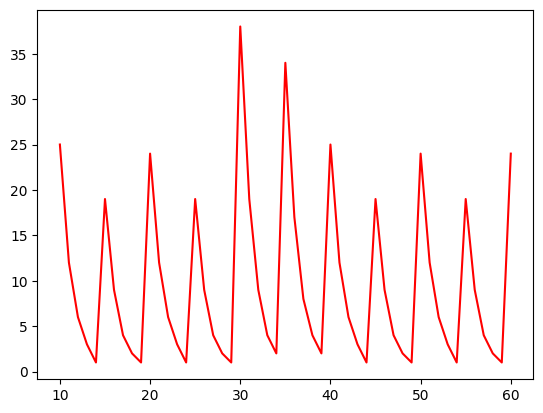

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pickle
import os

#### what we want to predict
def function(x):
    # return np.power(1.15,x)
    # return x*np.sin(x)
    # return x**3
    # return np.log(x)
    return x+0.1
    # return traffic[x]

def load_traffic_file():
    if os.path.exists(traffic_file_path):
        with open(traffic_file_path, "rb") as f:
            traffic = pickle.load(f) 
        
    return traffic

traffic_file_path = "traffic.pickle"

#### hyper parameter
epoch=7
trainData=10
input_len=3
num_of_prediction = 10

first_traning_data_idex = 10
last_traning_data_idex = 60

first_prediction_data_idex = last_traning_data_idex + 1
last_prediction_data_idex = first_prediction_data_idex + num_of_prediction

#### data preprocessing
buf=[]
x=[]
x_train=[]
x_test=[]
y_real=[]
y_train=[]
time = []

traffic = load_traffic_file()

# get x_train data
for i in range(first_traning_data_idex, last_traning_data_idex + 1):
    for j in range(i, i + input_len ):
        buf.append(traffic[j])
    x_train.append(buf)
    buf = []

# get y_train data
for i in range(first_traning_data_idex, last_traning_data_idex + 1):
    time.append(i)    
    y_train.append(traffic[i + input_len])
    y_real.append(traffic[i + input_len])

y_predict=copy.deepcopy(y_train)
x_train = np.array(x_train, dtype='f')
y_train = np.array(y_train, dtype='f')
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

#### model build-up
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(7, input_shape = (input_len, 1), activation ='tanh'))
model.add(Dense(4))
model.add(Dense(4))
model.add(Dense(1))
model.summary()

#### training
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(x_train, y_train, epochs=epoch, batch_size=1)


plt.plot(history.history["loss"])
plt.show()


plt.plot(time, y_real, color = 'red')
plt.show()
